In [20]:
from scipy import signal
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

In [21]:
overlap = 1024
frame_length = 2048

In [22]:
from scipy.io import wavfile

def readAudio(audio):
    fs, amp = wavfile.read(audio)
    dt = 1/fs
    n = len(amp)
    t = dt*n

    if t > 1.0:
        amp = amp[int((t/2 - 0.5)/dt):int((t/2 + 0.5)/dt)]
        n = len(amp)
        t = dt*n
    
    return(amp, fs, n, t)

Text(0.5, 1.0, 'signal')

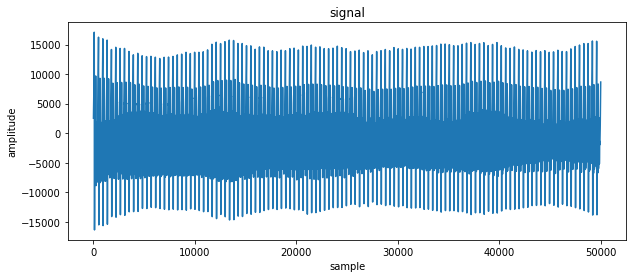

In [23]:
amp, fs, n ,t = readAudio('./data/male_healthy/1032-a_n.wav')

fig = plt.figure(figsize=(10,4))

plt.plot(amp)
plt.ylabel('amplitude')
plt.xlabel('sample')
plt.title('signal')

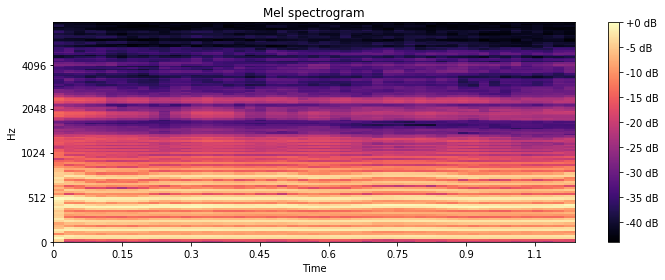

In [24]:
S = librosa.feature.melspectrogram(y=amp*1.0, sr=fs, n_fft=frame_length, hop_length=overlap, power=1.0)
fig = plt.figure(figsize=(10,4))

librosa.display.specshow(librosa.power_to_db(S,ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

original shape:  (128, 49)


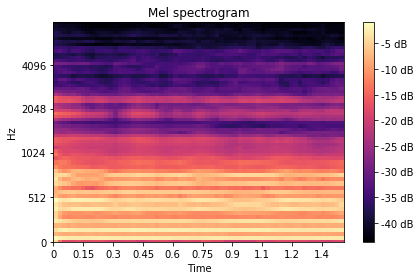

In [25]:
import cv2

print('original shape: ', librosa.power_to_db(S,ref=np.max).shape)
img = cv2.resize(librosa.power_to_db(S,ref=np.max),(64,64))
librosa.display.specshow(img, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [26]:
print(librosa.power_to_db(S,ref=np.max).shape)
import numpy as np

dS = np.gradient(librosa.power_to_db(S,ref=np.max), axis=0)
dS.shape
ddS = np.gradient(dS, axis=0)

(128, 49)


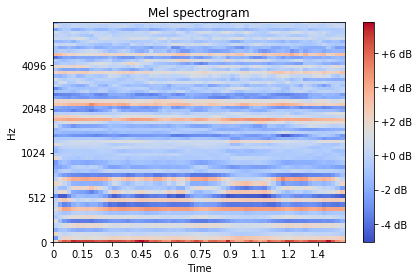

In [27]:
img = cv2.resize(dS,(64,64))
librosa.display.specshow(img, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

Text(0.5, 1.0, 'signal')

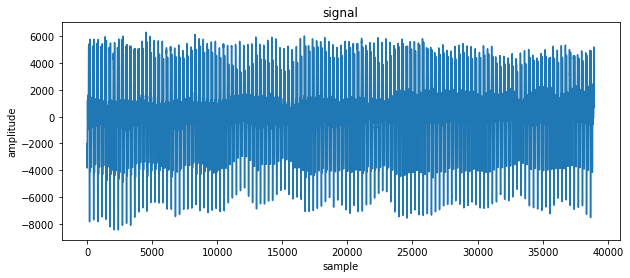

In [28]:
amp, fs, n, t = readAudio('./data/male_pathology/1930-a_n.wav')

fig = plt.figure(figsize=(10,4))

plt.plot(amp)
plt.ylabel('amplitude')
plt.xlabel('sample')
plt.title('signal')

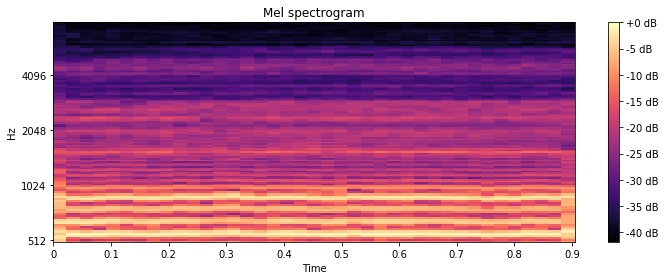

In [29]:
S = librosa.feature.melspectrogram(y=amp*1.0, sr=fs, n_fft=frame_length, hop_length=overlap, power=1.0, fmin=500.0)

fig = plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max), y_axis='mel', fmax=8000, fmin=500.0, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

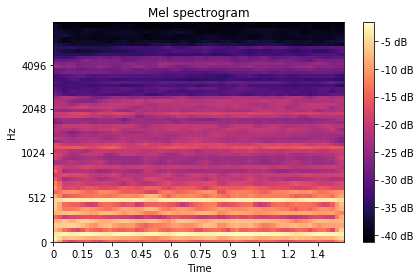

In [30]:
img = cv2.resize(librosa.power_to_db(S,ref=np.max),(64,64))
librosa.display.specshow(img, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [31]:
print(librosa.power_to_db(S,ref=np.max).shape)
import numpy as np

dS = np.gradient(librosa.power_to_db(S,ref=np.max), axis=0)
dS.shape
ddS = np.gradient(dS, axis=0)

(128, 39)


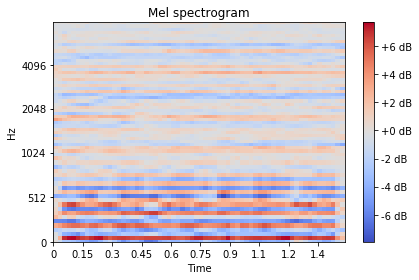

In [32]:
img = cv2.resize(dS,(64,64))
librosa.display.specshow(img, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()